In [1]:
import pandas as pd
import numpy as np
import sklearn
import pmdarima as pmd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
ap=pmd.datasets.load_airpassengers()
ab=pmd.datasets.load_ausbeer()
at=pmd.datasets.load_austres()
gas=pmd.datasets.load_gasoline(as_series=True)
heart=pmd.datasets.load_heartrate()
lynx=pmd.datasets.load_lynx()
msft=pmd.datasets.load_msft()
sun=pmd.datasets.load_sunspots()
taylor=pmd.datasets.load_taylor(as_series=True)
wine=pmd.datasets.load_wineind()
wool=pmd.datasets.load_woolyrnq()

In [151]:
np.log(wool)

pd.DataFrame(wine).to_csv('wine.csv')


In [44]:
arima=pmd.auto_arima(np.log(wool),m=4)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 4)   Log Likelihood                 131.429
Date:                            Sat, 11 Sep 2021   AIC                           -250.859
Time:                                    19:07:13   BIC                           -234.235
Sample:                                         0   HQIC                          -244.109
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.555e-05      0.000     -0.107      0.915      -0.000       0.000
ar.L1          0.6996      0.054     12.861      0.000       0.593       0.806
ma.L1         -0.9863      0.053    -18.457      0.000      -1.091      -0.882
ar.S.L4        0.3972      0.079      4.999      0.000       0.241       0.553
ar.S.L8        0.4048      0.079      5.103      0.000       0.249       0.560
sigma2         0.0058      0.001      7.835      0.000       0.004       0.007
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):                 7.59
Prob(Q):                              0.28   Prob(JB):                         0.02
Heteroskedasticity (H):               0.81   Skew:                            -0.39
Prob(H) (two-sided):                  0.52   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
res=arima.predict(n_periods=12,return_conf_int=True,alpha=.25)

In [72]:
df=pd.DataFrame(wool,columns=['actual'])
df
df2=pd.DataFrame(res)
df2=df2.T
df2.index=range(119,119+12)
df2.columns=['forecast','int']
low=[]
high=[]
for x in df2['int']:
    low.append(x[0])
    high.append(x[1])
df2['low']=low
df2['high']=high
df2=df2[['forecast','low','high']]
df2=df2.applymap(np.exp)
df_res=pd.concat((df,df2))
df_res

,actual,forecast,low,high
0,6172.0,NaN,NaN,NaN
1,6709.0,NaN,NaN,NaN
2,6633.0,NaN,NaN,NaN
3,6660.0,NaN,NaN,NaN
4,6786.0,NaN,NaN,NaN
...,...,...,...,...
126,NaN,6115.511309,5279.384165,7084.060830
127,NaN,5538.715351,4710.828830,6512.095610
128,NaN,5169.102352,4363.651743,6123.224469
129,NaN,5751.414021,4835.632727,6840.627713


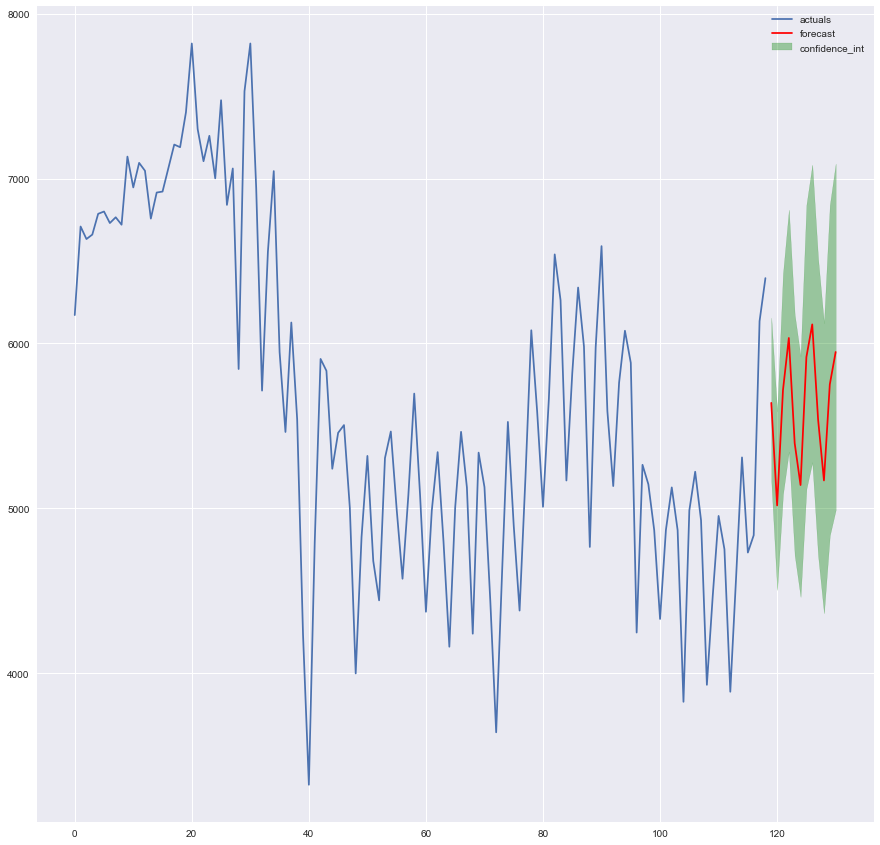

In [79]:
plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.plot(df_res.index,df_res['actual'],label='actuals')
plt.plot(df_res.index,df_res['forecast'],color='r',label='forecast')
plt.fill_between(df_res.index,df_res['low'],df_res['high'],alpha=.35,color='g',label='confidence_int')
plt.legend()
plt.show()

In [92]:
ser=pd.DataFrame(wool,columns=['wool'])
ser

,wool
0,6172.0
1,6709.0
2,6633.0
3,6660.0
4,6786.0
...,...
114,5309.0
115,4732.0
116,4837.0
117,6135.0


In [109]:
fwd=pd.Series.ewm(ser['wool'], span=4).mean()
bwd=pd.Series.ewm(ser['wool'][::-1], span=4).mean()

filtered = np.vstack(( fwd, bwd[::-1] ))
filtered = np.mean(filtered, axis=0 )
filtered=pd.DataFrame(filtered)
filtered.columns=['filter']

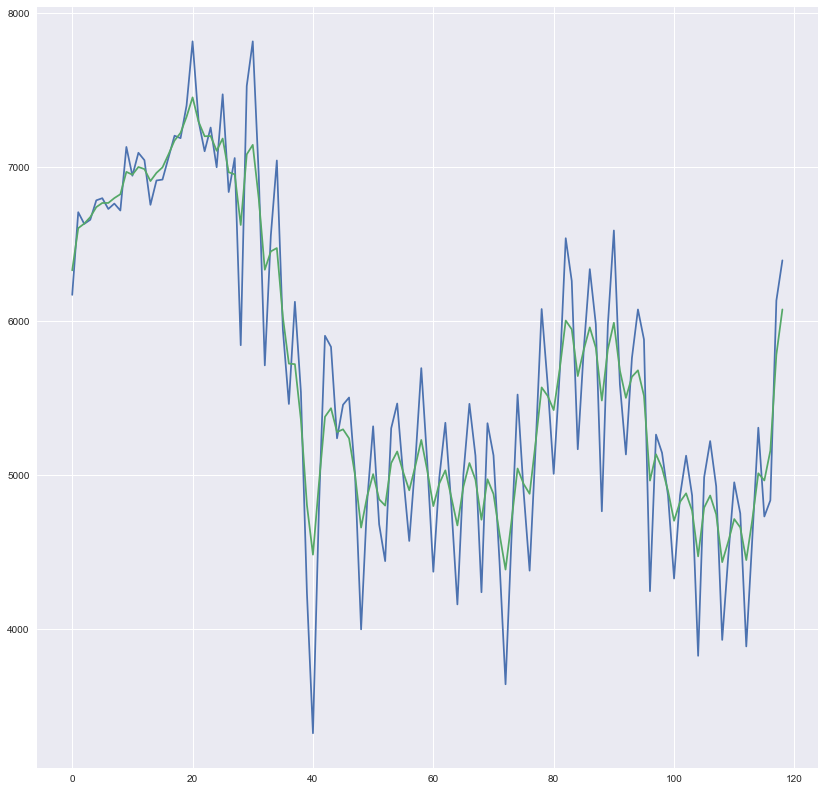

In [110]:
plt.figure(figsize=(14,14))
plt.plot(ser.index,ser['wool'],label='wool')
plt.plot(filtered.index,filtered['filter'],label='ewma')
plt.show()

In [139]:
from sklearn.datasets import load_iris
iris=load_iris()
iris
### ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
fts=iris.feature_names

iris.target_names
iris.target=pd.DataFrame(iris.target)
iris.data=pd.DataFrame(iris.data)

df=pd.concat((iris.data,iris.target),axis=1)
fts.append('target')
df.columns=fts
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', 'target']]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']],df['target'],stratify=df['target'],test_size=.25)

In [147]:
nb=GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
print(nb.score(X_test, y_test))

0.9464285714285714
1.0
